# GLOBAL FOOD PRICES UPDATED

In [1]:
#Importing libraries

import numpy as pandas 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

sns.set(rc={'figure.figsize':(12,8)})
import warnings
warnings.filterwarnings("ignore")

In [2]:
gfp = pd.read_csv('wfpvam_foodprices.csv', encoding = 'unicode_escape', engine ='python')

In [3]:
#Setting display
pd.set_option('display.max_columns', 700) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.width', 1000) 

In [4]:
gfp.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [5]:
print(f"This data comtains {gfp.shape[0]} rows and {gfp.shape[1]} columns")

This data comtains 1960375 rows and 18 columns


In [6]:
gfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960375 entries, 0 to 1960374
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   adm0_id             float64
 1   adm0_name           object 
 2   adm1_id             int64  
 3   adm1_name           object 
 4   mkt_id              int64  
 5   mkt_name            object 
 6   cm_id               int64  
 7   cm_name             object 
 8   cur_id              float64
 9   cur_name            object 
 10  pt_id               int64  
 11  pt_name             object 
 12  um_id               int64  
 13  um_name             object 
 14  mp_month            int64  
 15  mp_year             int64  
 16  mp_price            float64
 17  mp_commoditysource  float64
dtypes: float64(4), int64(7), object(7)
memory usage: 269.2+ MB


In [7]:
gfp.rename(columns={'adm0_name':'country',
                   'adm1_name':'city',
                   'mkt_name':'market',
                    'cm_name':'food',
                   'cur_name':'currency',
                    'um_name' : 'unit',
                    'pt_name':'type'},
                   inplace=True)

In [8]:
gfp.drop(['adm0_id', 'adm1_id', 'mkt_id', 'cm_id', 'cur_id', 'pt_id', 'um_id', 'mp_commoditysource'], axis = 1, inplace = True)

In [9]:
gfp.head()

,country,city,market,food,currency,type,unit,mp_month,mp_year,mp_price
0,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,1,2014,50.0
1,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,2,2014,50.0
2,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,3,2014,50.0
3,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,4,2014,50.0
4,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,5,2014,50.0


In [10]:
gfp.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,1960375,98,Rwanda,136993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1370441,616,North/Amajyaruguru,34661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market,1960375,3193,National Average,19485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food,1960375,838,Millet - Retail,54558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currency,1960375,84,XOF,253185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,1960375,4,Retail,1793194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unit,1960375,125,KG,1458503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mp_month,1.96038e+06,NaN,NaN,NaN,6.39112,3.46257,1,3,6,9,12
mp_year,1.96038e+06,NaN,NaN,NaN,2015.91,4.43672,1990,2014,2017,2020,2021
mp_price,1.96038e+06,NaN,NaN,NaN,6509.23,109240,0,43.85,241.667,1200,2.17778e+07


In [11]:
#Checking for missing data
gfp.isnull().sum()

country          0
city        589934
market           0
food             0
currency         0
type             0
unit             0
mp_month         0
mp_year          0
mp_price         0
dtype: int64

In [12]:
#gfp['city'].value_counts()

In [13]:
gfp['city'].fillna(gfp['city'].mode()[0], inplace=True)

In [14]:
gfp['mp_year'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2000, 2001, 2002, 2021,
       1996, 1997, 1998, 1999, 1994, 1995, 1992, 1993, 1990, 1991],
      dtype=int64)

In [15]:
gfp.set_index('mp_year')

,country,city,market,food,currency,type,unit,mp_month,mp_price
mp_year,,,,,,,,,
2014,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,1,50.0000
2014,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,2,50.0000
2014,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,3,50.0000
2014,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,4,50.0000
2014,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,5,50.0000
...,...,...,...,...,...,...,...,...,...
2021,Zimbabwe,Midlands,Matibi,Handwash soap - Retail,ZWL,Retail,250 G,2,80.3333
2021,Zimbabwe,Midlands,Matibi,Handwash soap - Retail,ZWL,Retail,250 G,3,20.3333
2020,Zimbabwe,Midlands,Matibi,Fish (kapenta) - Retail,ZWL,Retail,KG,12,1187.5000


In [16]:
gfp=gfp.loc[gfp.mp_year.isin(['2000', '2001', '2002', '2003', '2004', '2005', '2006','2007', '2008', '2009', '2010', '2011', 
                          '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])]

In [17]:
gfp['mp_year'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2000, 2001, 2002, 2021],
      dtype=int64)

In [18]:
gfp.set_index('mp_year')

,country,city,market,food,currency,type,unit,mp_month,mp_price
mp_year,,,,,,,,,
2014,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,1,50.0000
2014,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,2,50.0000
2014,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,3,50.0000
2014,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,4,50.0000
2014,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,5,50.0000
...,...,...,...,...,...,...,...,...,...
2021,Zimbabwe,Midlands,Matibi,Handwash soap - Retail,ZWL,Retail,250 G,2,80.3333
2021,Zimbabwe,Midlands,Matibi,Handwash soap - Retail,ZWL,Retail,250 G,3,20.3333
2020,Zimbabwe,Midlands,Matibi,Fish (kapenta) - Retail,ZWL,Retail,KG,12,1187.5000


In [19]:
gfp['product'] = gfp['food'].str.split(' - ', n=2, expand=True)[0]

In [20]:
gfp.head()

,country,city,market,food,currency,type,unit,mp_month,mp_year,mp_price,product
0,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,1,2014,50.0,Bread
1,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,2,2014,50.0,Bread
2,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,3,2014,50.0,Bread
3,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,4,2014,50.0,Bread
4,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,5,2014,50.0,Bread


In [21]:
gfp.drop(['food'], axis=1, inplace = True)

In [22]:
gfp.head()

,country,city,market,currency,type,unit,mp_month,mp_year,mp_price,product
0,Afghanistan,Badakhshan,Fayzabad,AFN,Retail,KG,1,2014,50.0,Bread
1,Afghanistan,Badakhshan,Fayzabad,AFN,Retail,KG,2,2014,50.0,Bread
2,Afghanistan,Badakhshan,Fayzabad,AFN,Retail,KG,3,2014,50.0,Bread
3,Afghanistan,Badakhshan,Fayzabad,AFN,Retail,KG,4,2014,50.0,Bread
4,Afghanistan,Badakhshan,Fayzabad,AFN,Retail,KG,5,2014,50.0,Bread


In [23]:
gfp.pivot_table(values=['mp_price','unit'],index=['country','product'],aggfunc=['max', 'min', 'count', 'sum'])

max                   min             count                 sum
                                                              mp_price     unit     mp_price     unit mp_price  unit      mp_price
country     product                                                                                                               
Afghanistan Bread                                         7.100000e+01       KG       6.0000       KG     1668  1668  6.460473e+04
            Exchange rate                                 8.042500e+01  USD/LCU      56.4750  USD/LCU      968   968  6.989586e+04
            Fuel (diesel)                                 1.472630e+05        L      10.0000        L     1330  1330  4.607582e+06
            Livestock (sheep, one-year-old alive female)  5.833333e+06     Unit  168889.0000     Unit      187   187  3.341234e+08
            Oil (cooking)                                 1.475000e+02       KG      78.0000       KG      408   408  4.395820e+04
...                                                                ...      ...          ...      ...      ...   ...           ...
Zimbabwe    Sugar                                         1.500000e+02       KG      95.7083       KG      295   295  3.399166e+04
            Sugar (white, fortified)                      3.000000e+00       KG       0.7500       KG      103   103  1.303400e+02
            Toothpaste                                    2.733333e+02   100 ML      75.0000   100 ML      287   287  3.163286e+04
            Wheat                                         1.250000e+00       KG       0.4000       KG       64    64  3.272000e+01
            Wheat flour (fortified)                       4.750000e+00       KG       0.9000       KG       79    79  1.007600e+02

[2300 rows x 7 columns]

In [24]:
items=gfp['product'].value_counts()[:25]

Text(0.5, 1.0, 'Top 25 items produced around globe')

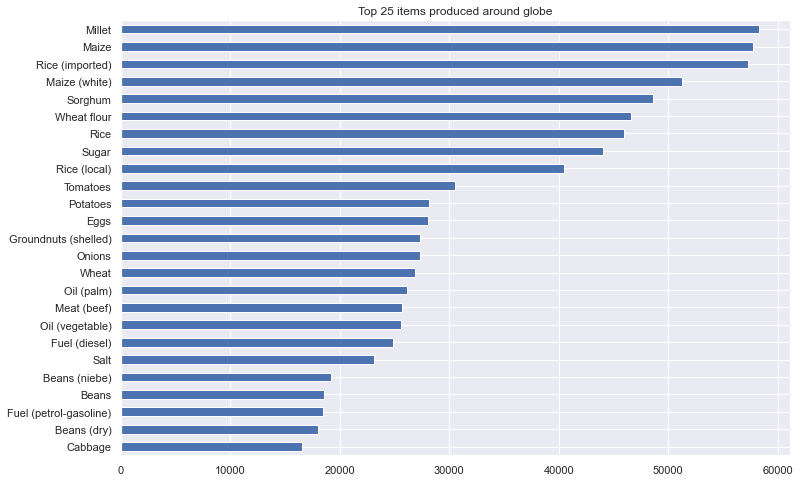

In [25]:
items.sort_values(ascending=True).plot(kind='barh', figsize=(12, 8))
plt.title("Top 25 items produced around globe")

In [26]:
gfp['product'].nunique()

636

In [27]:
to_drop1 = gfp[gfp['product'].apply(lambda x: x.startswith('Fuel'))].index
to_drop2 = gfp[gfp['product'].apply(lambda x: x.startswith('Wage'))].index
to_drop3 = gfp[gfp['product'].apply(lambda x: x.startswith('Transport'))].index
to_drop4 = gfp[gfp['product'].isin(['Alcohol (spray)','Bleach (chlorine)', 'Surgical mask', 'Hand sanitizer (gel)','Plastic gloves', 'Internet bundle', 
           'Electricity', 'Water', 'Curd', 'Sour cream', 'Multipurpose soap',  'Toothbrush', 'Sanitary pads', 'Toothpaste',
           'Firewood', 'Exchange rate'])].index

In [28]:
gfp = gfp.drop(to_drop1)
gfp = gfp.drop(to_drop2)
gfp = gfp.drop(to_drop3)
gfp = gfp.drop(to_drop4)

In [29]:
gfp['product'].nunique()

600

In [30]:
gfp['product'].unique()

array(['Bread', 'Wheat', 'Rice (low quality)',
       'Livestock (sheep, one-year-old alive female)', 'Oil (cooking)',
       'Sugar', 'Pulses', 'Wheat flour (high quality)', 'Salt',
       'Rice (high quality)', 'Wheat flour (low quality)', 'Wheat flour',
       'Rice', 'Beans (white)', 'Milk', 'Potatoes', 'Eggs',
       'Meat (chicken)', 'Lentils', 'Pasta', 'Tomatoes', 'Oil',
       'Meat (beef)', 'Cheese (dry)', 'Carrots', 'Onions', 'Bananas',
       'Tea', 'Fish (canned)', 'Apples', 'Oranges', 'Milk (camel)',
       'Meat (camel)', 'Tea (sahm)', 'Oil (palm)', 'Cassava flour',
       'Maize flour', 'Rice (regular, milled)', 'Milk (powder)',
       'Oil (soybean)', 'Sugar (white)', 'Salt (iodised)',
       'Rice (white, imported)', 'Maize meal (yellow)',
       'Fish (mackerel, dry)', 'Beans (kidney, pinto)', 'Rice (white)',
       'Maize (yellow)', 'Beans', 'Oil (vegetable)', 'Meat (pork)',
       'Peas (split, dry)', 'Cabbage', 'Apples (red)',
       'Cucumbers (greenhouse)', 'Toma

In [31]:
gfp.head()

,country,city,market,currency,type,unit,mp_month,mp_year,mp_price,product
0,Afghanistan,Badakhshan,Fayzabad,AFN,Retail,KG,1,2014,50.0,Bread
1,Afghanistan,Badakhshan,Fayzabad,AFN,Retail,KG,2,2014,50.0,Bread
2,Afghanistan,Badakhshan,Fayzabad,AFN,Retail,KG,3,2014,50.0,Bread
3,Afghanistan,Badakhshan,Fayzabad,AFN,Retail,KG,4,2014,50.0,Bread
4,Afghanistan,Badakhshan,Fayzabad,AFN,Retail,KG,5,2014,50.0,Bread


In [32]:
gfp["date"] = gfp["mp_year"].astype(str) + '-' + gfp["mp_month"].astype(str)

In [33]:
from datetime import datetime
gfp['date'] = pd.to_datetime(gfp['date'])
gfp.set_index('date', inplace=True)
gfp.sort_values(by=['date'], inplace=True)

In [34]:
gfp.head()

,country,city,market,currency,type,unit,mp_month,mp_year,mp_price,product
date,,,,,,,,,,
2000-01-01,Bassas da India,North/Amajyaruguru,Bhopal,INR,Retail,KG,1,2000,7.500,Wheat
2000-01-01,Mozambique,North/Amajyaruguru,AngÃ³nia,MZN,Retail,KG,1,2000,9.220,Rice
2000-01-01,Ethiopia,Addis Ababa,Addis Ababa,ETB,Wholesale,100 KG,1,2000,187.250,Sorghum (white)
2000-01-01,South Africa,Gauteng,Randfontein,ZAR,Wholesale,KG,1,2000,0.649,Wheat
2000-01-01,Bassas da India,North/Amajyaruguru,Bhubaneshwar,INR,Retail,KG,1,2000,16.500,Sugar


In [35]:
print(f"This data comtains {gfp.shape[0]} rows and {gfp.shape[1]} columns")

This data comtains 1853855 rows and 10 columns


In [42]:
gfp.to_csv('wfpvam_foodprices.csv')

In [43]:
foodprice = pd.read_csv('wfpvam_foodprices.csv', index_col='date')
#refugee = pd.read_csv('....csv')
#climate = pd.read_csv('....csv')
#currency = pd.read_csv('....csv')

In [38]:
#gfp_climate = pd.merge(gfp, climate, on=['country'])
#gfp_climate_refugee = pd.merge(refugee, gfp_climate, on=['country'])
#combine_gfp = pd.merge(currency, gfp_climate_refugee, on=['country'])

In [39]:
foodprice.head()

,country,city,market,currency,type,unit,mp_month,mp_year,mp_price,product
date,,,,,,,,,,
2000-01-01,Bassas da India,North/Amajyaruguru,Bhopal,INR,Retail,KG,1,2000,7.500,Wheat
2000-01-01,Mozambique,North/Amajyaruguru,AngÃ³nia,MZN,Retail,KG,1,2000,9.220,Rice
2000-01-01,Ethiopia,Addis Ababa,Addis Ababa,ETB,Wholesale,100 KG,1,2000,187.250,Sorghum (white)
2000-01-01,South Africa,Gauteng,Randfontein,ZAR,Wholesale,KG,1,2000,0.649,Wheat
2000-01-01,Bassas da India,North/Amajyaruguru,Bhubaneshwar,INR,Retail,KG,1,2000,16.500,Sugar
